In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install missingno
import missingno as msno
import matplotlib.style as style; style.use ('bmh')
from scipy import stats;
from scipy.stats import zscore, norm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics  import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC

!pip install nbconvert

#supress warnings
import warnings; warnings.filterwarnings ('ignore')

## Importing and Visualizing the Dataset

In [ ]:
# impoting the dataset
df = pd.read_csv ("D:\\python assignment\\Project\\risk_factors_cervical_cancer.csv")
df.head ()
df.tail ()

# our data has 857 patient details with 36 characteristics (columns)

In [ ]:
# Checking datatypes

df. info ()

# datatype looks normal.
#However many columns as described in database are boolean, but mentioned here as int. This will be taken care of later

In [ ]:
# checking for null values

df.isnull(). sum()

# No null values observed.

## Checking and replacing null/missing values

In [ ]:
# Checking for distinct values

df.nunique()

In [ ]:
# Our data has '?' in few columns Replancing them with null.

for x in df.columns:
    df[x].replace ('?', np.nan, inplace = True)

In [ ]:
df.head ()
df.tail ()

In [ ]:
df.isnull(). sum()

In [ ]:
msno.bar (df)
plt.show (), style == ('bmh')

In [ ]:
# Finding out mean to replace for null values

df. isnull (). mean ()*100

In [ ]:
# As the two columns has only 71 values, we will drop the columns
df.drop (['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis = 1, inplace = True)

In [ ]:
df.head()

In [ ]:
# changing data type

for x in df.columns:
        df[x] = df[x].astype (str).astype (float)

df.dtypes

In [ ]:
for x in df.columns:
    value = df[x].mode(dropna = True).loc[0]
    print(f'{x} : {value}')
    df[x].fillna(value, inplace = True)

In [ ]:
msno.bar (df)

## Data visualisation

In [ ]:
sns.pairplot (df, diag_kind = 'kde')

#too busy images

In [ ]:
df.describe (). T

In [ ]:
style.use ('bmh')
columns = df.columns
df [columns]. hist (stacked = False, bins = 36, figsize = (20, 10), layout = (6,6))

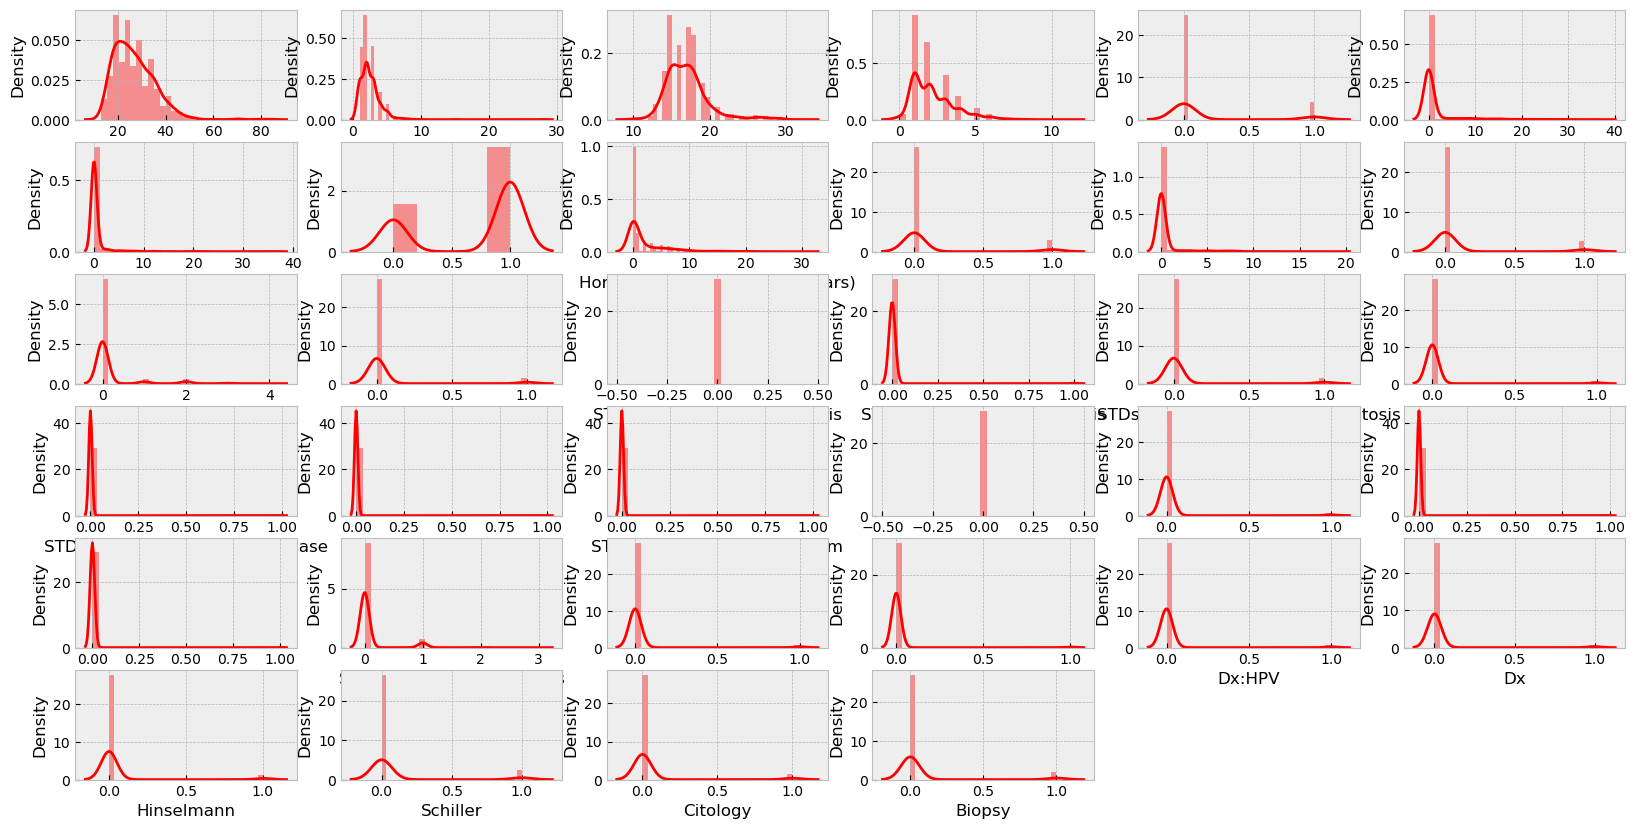

In [ ]:
# Density Plots

plt.figure (figsize = (20,10))
col = 1
for i in df.columns:
    plt.subplot (6,6, col)
    sns.distplot (df [i], color = 'r')
    col += 1

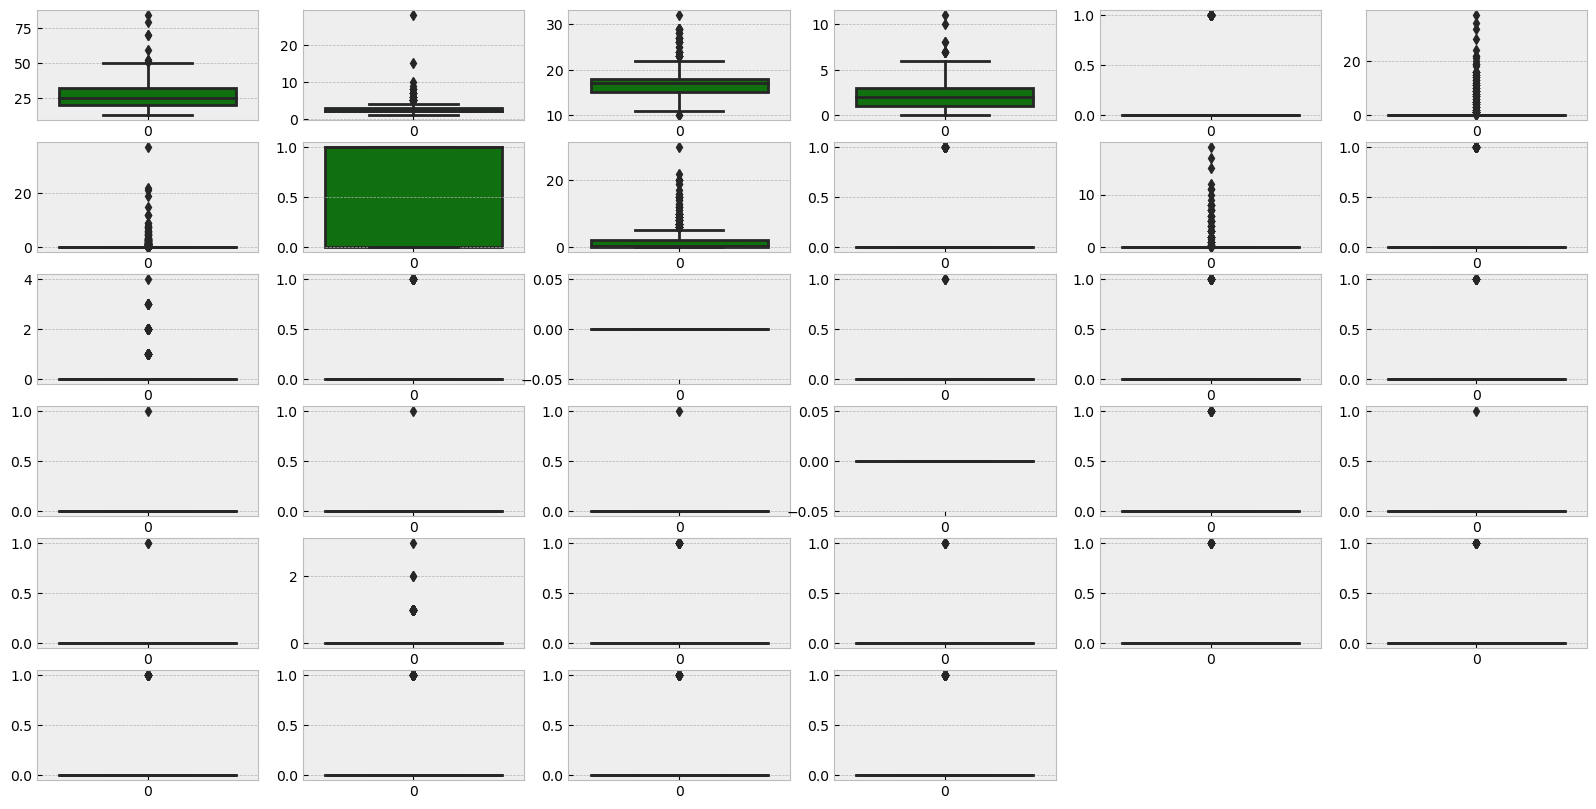

In [ ]:
# boxplot for outliers

plt.figure (figsize = (20, 10))
col = 1

for i in df.columns:
    plt.subplot (6,6, col)
    sns.boxplot (df [i], color = 'g')
    col += 1

<Axes: xlabel='Dx:Cancer', ylabel='count'>

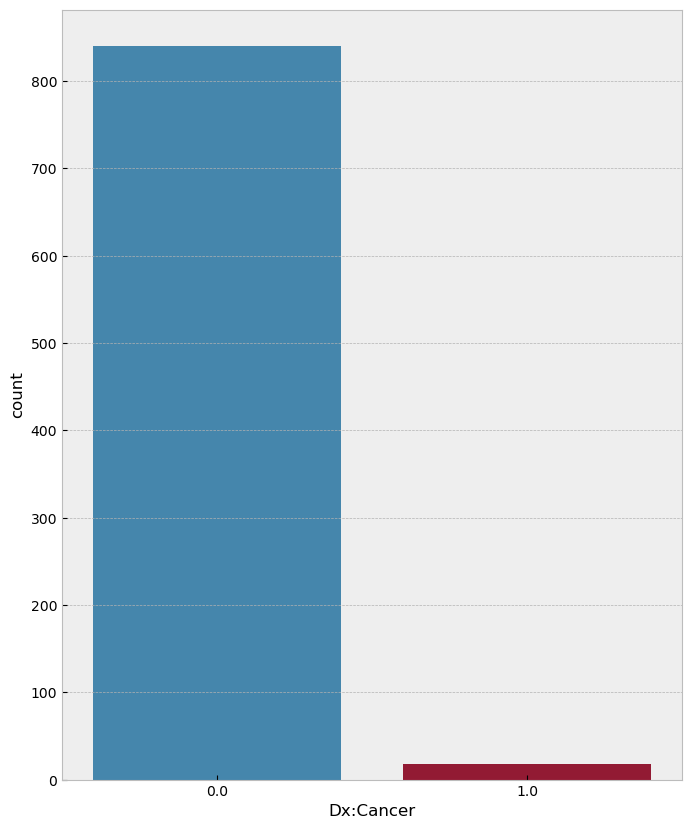

In [ ]:
plt.figure (figsize = (8,10))
sns.countplot (x = 'Dx:Cancer', data = df)

## Feature Scaling

In [ ]:
y = df ['Dx:Cancer']
x = df.drop(['Dx:Cancer'], axis =1)

In [ ]:
scaler = StandardScaler ()

x_scaled = scaler.fit_transform(x)

In [ ]:
# Finding accuracies of diff random seeds
accuracy_scores = []
seeds = range (0,101)

for seed in seeds:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed, stratify = y)
    model = LogisticRegression ()
    model.fit (x_train, y_train)
    prediction = model.predict (x_test)
    logit_score = accuracy_score (y_test, prediction)
    accuracy_scores.append (logit_score)

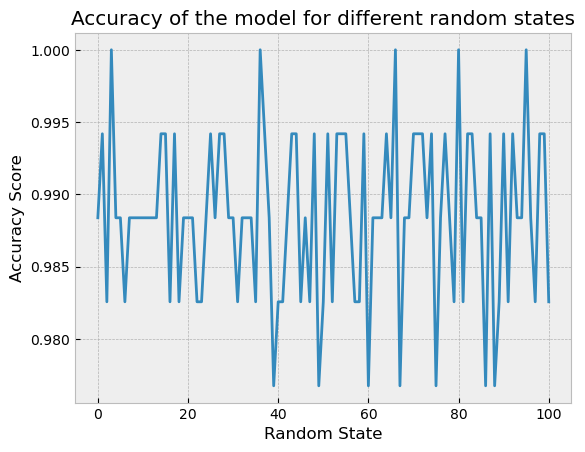

In [ ]:
#Plotting the accuracies of the model on different random states:
plt.plot(seeds, accuracy_scores)
plt.title("Accuracy of the model for different random states")
plt.ylabel('Accuracy Score')
plt.xlabel('Random State')
plt.show()

In [ ]:
# Finding random state with max accuracy

max_acc = max(accuracy_scores)
max_random_state = accuracy_scores.index(max_acc)
print ("Highest Acccuracy is:", max_acc)
print ("Random state offering max accuracy is:", max_random_state)

Highest Acccuracy is: 1.0
Random state offering max accuracy is: 3


In [ ]:
# splitting the data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = max_random_state, stratify = y)

x_train.shape, x_test.shape

((686, 33), (172, 33))

## Logistic Regression

In [ ]:
classifier = LogisticRegression(random_state = 20)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=20)

In [ ]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 1.0


## SVM

In [ ]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[168   0]
 [  0   4]]


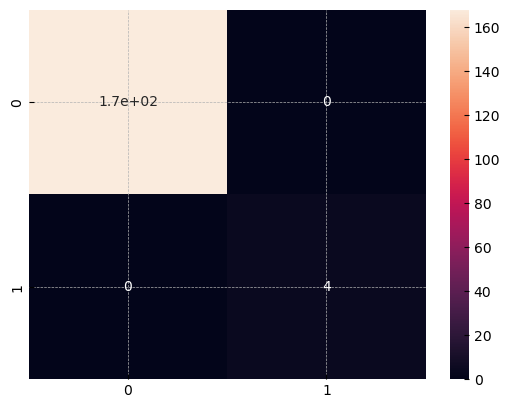

In [ ]:
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
acc2 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc2}")

Accuracy score: 1.0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       168
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172



## KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred1 = classifier.predict (x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred1)
print(cm)

[[168   0]
 [  0   4]]


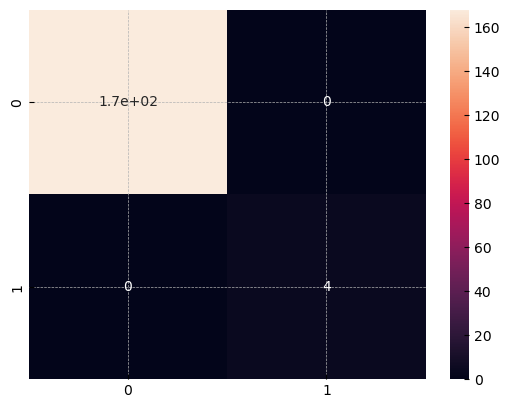

In [ ]:
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
acc3 = accuracy_score(y_test, y_pred1)
print(f"Accuracy score: {acc3}")

Accuracy score: 1.0


In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       168
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172

